In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

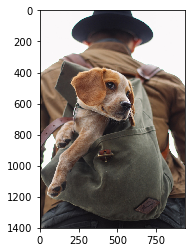

In [5]:
img1 = cv2.imread('../../data/images/dog_backpack.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(img1)

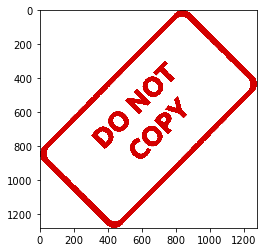

In [6]:
img2 = cv2.imread('../../data/images/watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img2)

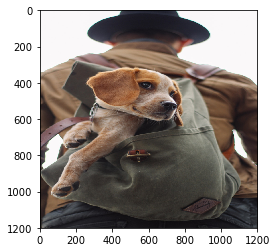

In [10]:
img1 = cv2.resize(img1, (1200, 1200))
img2 = cv2.resize(img2, (1200, 1200))

plt.imshow(img1)

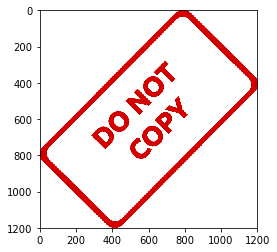

In [11]:
plt.imshow(img2)

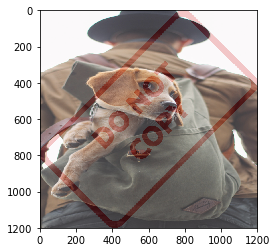

In [15]:
blended = cv2.addWeighted(img1, 0.8, img2, 0.2, 0)
plt.imshow(blended)

Copy and paste one image to another

In [21]:
large_img = cv2.imread('../../data/images/dog_backpack.jpg')
large_img = cv2.cvtColor(large_img, cv2.COLOR_BGR2RGB)

small_img = cv2.imread('../../data/images/watermark_no_copy.png')
small_img = cv2.cvtColor(small_img, cv2.COLOR_BGR2RGB)
small_img = cv2.resize(small_img, (600, 600))

In [22]:
print(large_img.shape)
print(small_img.shape)

(1401, 934, 3)
(600, 600, 3)


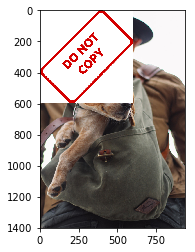

In [24]:
large_img[:small_img.shape[0],:small_img.shape[1],:] = small_img
plt.imshow(large_img)

Image Masking - Logo on another Image

Convert Mask to have 3 channels

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

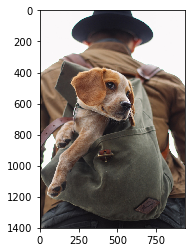

In [45]:
img1 = cv2.imread('../../data/images/dog_backpack.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(img1)

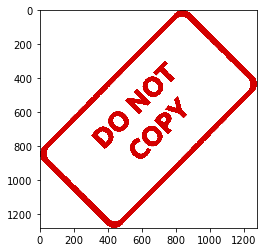

In [46]:
img2 = cv2.imread('../../data/images/watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img2)

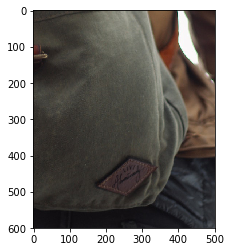

In [52]:
img1_r, img1_c, img1_channels = img1.shape
roi_r = 600
roi_c = 500
roi = img1[img1_r-roi_r:img1_r,img1_c-roi_c:img1_c]# BOTTOM RIGHT CORNER
plt.imshow(roi)

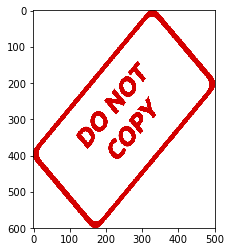

In [54]:
img2_resized = cv2.resize(img2, (roi_c, roi_r))
plt.imshow(img2_resized)

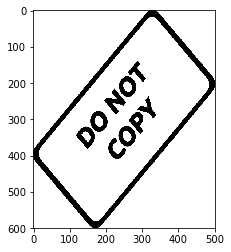

In [56]:
img2gray = cv2.cvtColor(img2_resized, cv2.COLOR_BGR2GRAY)
plt.imshow(img2gray, cmap='gray')

We need to convert grayscale image to threshold image to able to extract mask

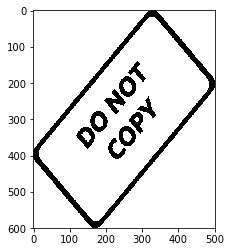

In [69]:
ret, mask = cv2.threshold(img2gray, 100, 255, cv2.THRESH_BINARY)
plt.imshow(mask, cmap='gray')

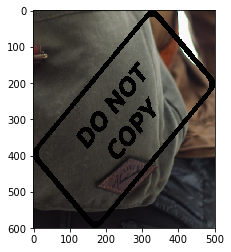

In [72]:
roi_bg = cv2.bitwise_and(roi, roi, mask=mask)
plt.imshow(roi_bg)

We need inverted mask, so that we can apply mask foreground on top it and add to the original image

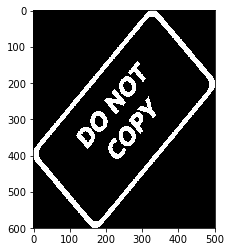

In [71]:
mask_inv = cv2.bitwise_not(mask)
plt.imshow(mask_inv, cmap='gray')

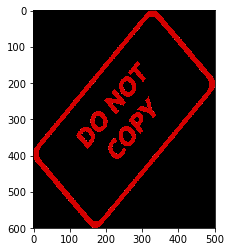

In [78]:
roi_fg = cv2.bitwise_and(img2_resized, img2_resized, mask = mask_inv)
plt.imshow(roi_fg)

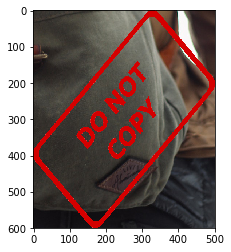

In [74]:
final_roi = roi_bg + roi_fg
plt.imshow(final_roi)

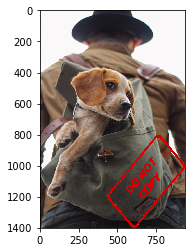

In [75]:
watermarked_img = np.copy(img1)
watermarked_img[img1_r-roi_r:img1_r, img1_c-roi_c:img1_c] = final_roi
plt.imshow(watermarked_img)